<a href="https://colab.research.google.com/github/jmbanda/CSC4850-Machine-Learning/blob/main/ML_example5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron (MLP)

Salient points of Multilayer Perceptron (MLP) in Scikit-learn

There is no activation function in the output layer.

For regression scenarios, the square error is the loss function, and cross-entropy is the loss function for the classification

It can work with single as well as multiple target values regression.

Unlike other popular packages, likes Keras the implementation of MLP in Scikit doesn’t support GPU.

We cannot fine-tune the parameters like different activation functions, weight initializers etc. for each layer.


## Regression Example

Step 1: In the Scikit-Learn package, MLPRegressor is implemented in neural_network module. We will import the other modules like “train_test_split” to split the dataset into training and train set to test the model, “fetch_california_housing” to get the data, and “StandardScaler” to scale the data as different features( independent variables) have wide value range scale. It is very important to scale the data used for training the model.

You can learn more about different scalers in the article Feature Scaling — [Effect Of Different Scikit-Learn Scalers: Deep Dive](https://towardsdatascience.com/feature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

Step 2: We will split the dataset into train and test dataset. We have reserved 20% of the dataset for checking the accuracy of the trained model. Independent train and test dataset are further scaled to make sure that the input data is standard normally distributed are centred around zero and have variance in the same order.

In [ ]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

Step 3: We scale the data just like the above regression example and for the same reason.

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)


Step 4: In the below code, three hidden layers are modelled, with 64 neurons in each layer. Considering the input and output layer, we have a total of 5 layers in the model. In case any optimiser is not mentioned then “Adam” is the default optimiser and it can manage pretty large dataset.

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

In addition to “RELU” activation, MLPRegressor supports the “sigmoid” and “hyperbolic tan” function.

Step 5: In the below code, the trained model is used to predict the target values of the reserved test dataset, which model has not seen before.

In [ ]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7633133194206162


## Classification Example

We have seen a regression example. Next, we will go through a classification example. In Scikit-learn “ MLPClassifier” is available for Multilayer Perceptron (MLP) classification scenarios.

Step1: Like always first we will import the modules which we will use in the example. We will use the Iris database and MLPClassifierfrom for the classification example.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Step 2: In separate data frames “X” and “y”, the values of the independent and dependent features are stored.

iris_data = load_iris()

In [ ]:
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

Step 3: Similar to the regression example above we will split the dataset into train and test dataset. We have reserved 20% of the dataset for checking the accuracy of the trained model. Independent train and test dataset are further scaled to make sure that the input data is standard normally distributed are centred around zero and have variance in the same order.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

Step 4: In the below code, we have modelled four hidden layers with different neurons in each layer. Considering the input and output layer, we have a total of 6 layers in the model. In case any optimiser is not mentioned then “Adam” is the default optimiser.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9666666666666667


The classifier shows quite a high score for the test data. It is important to understand the areas in which the classification model is making an error to make a full sense of model accuracy.

Step 5: We will draw a confusion matrix to understand the classifications which are made incorrect by the model.

Confusion Matrix for Iris Dataset
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


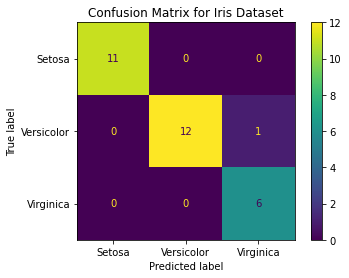

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
  clf,
  X_testscaled,
  y_test,
  display_labels=["Setosa","Versicolor","Virginica"]
)
title="Confusion Matrix for Iris Dataset"
disp.ax_.set_title(title)

print(disp.confusion_matrix)


It seems only one “Versicolor” species is incorrectly identified as “Virginica” and rest by the model.

Conclusion: We can do simple deep learning regression and classification model in Scikit-learn. In my view, it is not up for any real-life large-scale modelling as there is no GPU support and very limited options to tweak the parameters.